In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customer_df = pd.read_csv('Mall_Customers.csv')

In [236]:
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [237]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<Axes: >

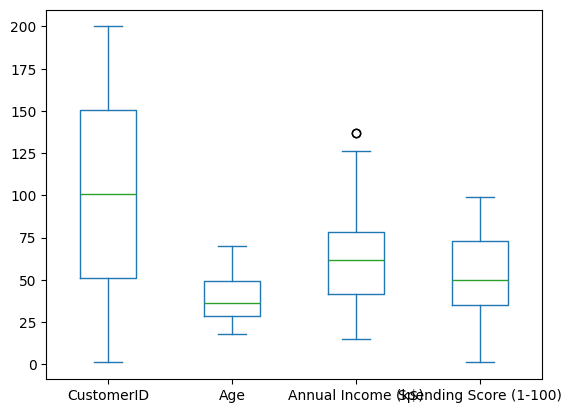

In [238]:
customer_df.plot.box()

In [239]:
customer_df.sort_values(by='Annual Income (k$)', ascending=False)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
199,200,Male,30,137,83
198,199,Male,32,137,18
197,198,Male,32,126,74
196,197,Female,45,126,28
195,196,Female,35,120,79
...,...,...,...,...,...
5,6,Female,22,17,76
2,3,Female,20,16,6
3,4,Female,23,16,77
1,2,Male,21,15,81


/var/folders/kv/zsmhs7bj6sq4vwmj7wk239yc0000gn/T/ipykernel_99023/4255263385.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
/var/folders/kv/zsmhs7bj6sq4vwmj7wk239yc0000gn/T/ipykernel_99023/4255263385.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
/var/folders/kv/zsmhs7bj6sq4vwmj7wk239yc0000gn/T/ipykernel_99023/4255263385.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


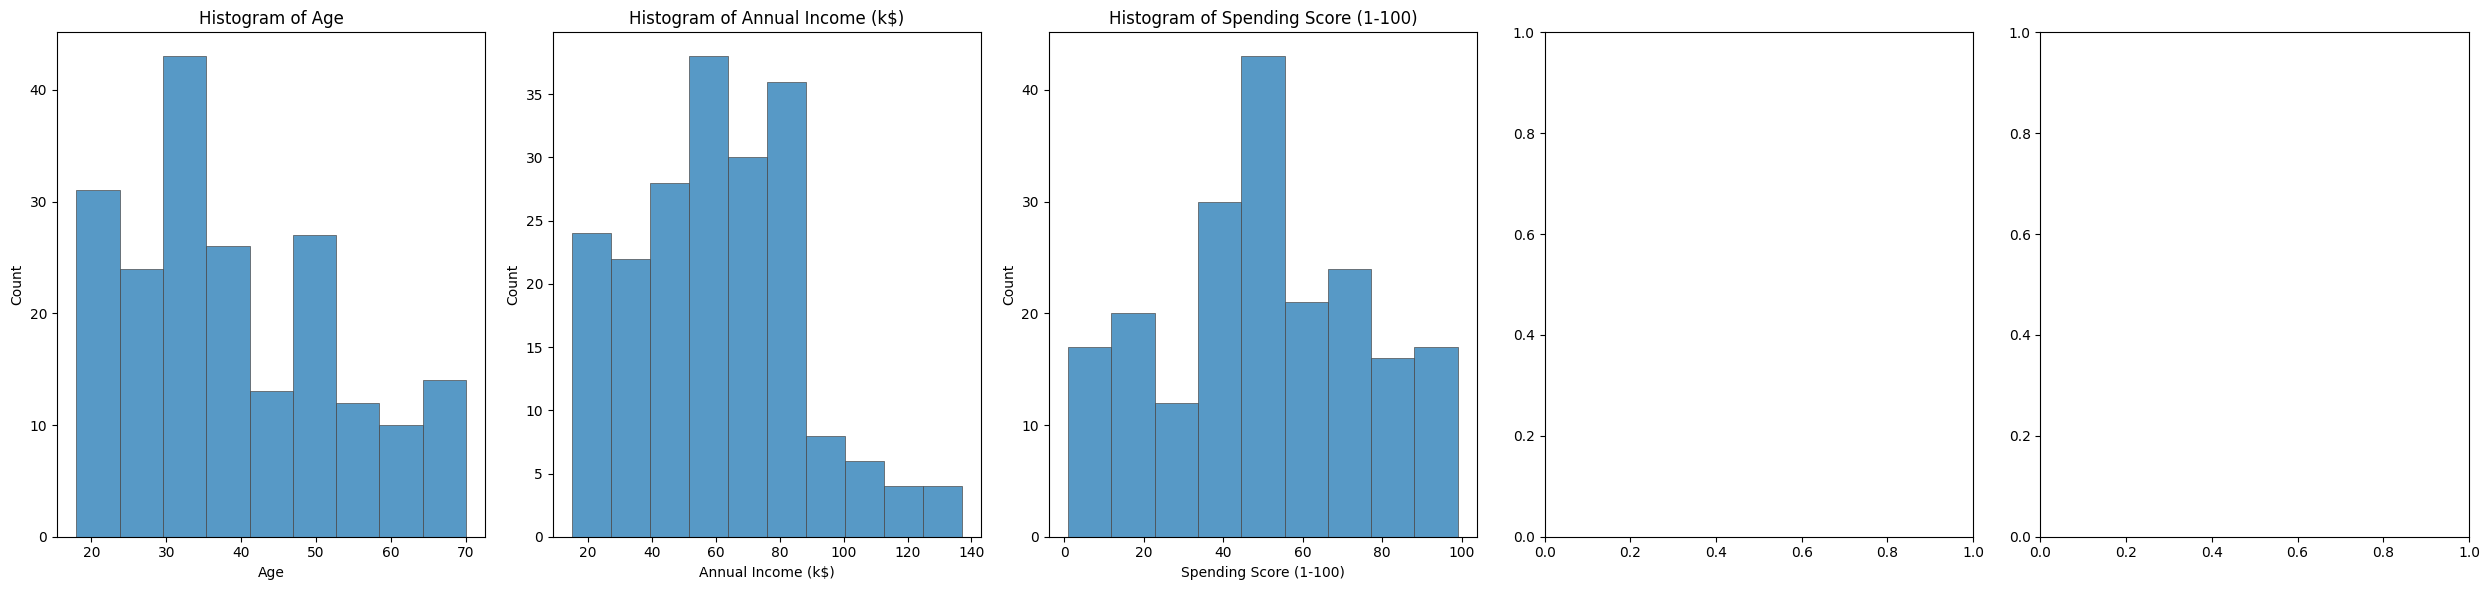

In [240]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

rows = 1
cols = len(customer_df.columns)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 6))  # 열 개수에 따라 가로 크기 조정

axes = axes.flatten()

for idx, column in enumerate(columns):
    sns.histplot(
        data=customer_df,
        ax=axes[idx],
        x=column,
        multiple="stack",
        palette="light:m_r",
        edgecolor=".3",
        linewidth=.5,
        log_scale=False
    )
    axes[idx].set_title(f'Histogram of {column}')

plt.tight_layout()
plt.show()


In [241]:
# IQR 계산
Q1 = customer_df['Annual Income (k$)'].quantile(0.25)
Q3 = customer_df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

# IQR을 이용한 이상치 탐지
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = customer_df[(customer_df['Annual Income (k$)'] < lower_bound) | (customer_df['Annual Income (k$)'] > upper_bound)]
outliers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [242]:
customer_df_no_outliers = customer_df[(customer_df['Annual Income (k$)'] >= lower_bound) & (customer_df['Annual Income (k$)'] <= upper_bound)]
customer_df_no_outliers


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


In [243]:
from sklearn.preprocessing import StandardScaler
data = customer_df_no_outliers[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

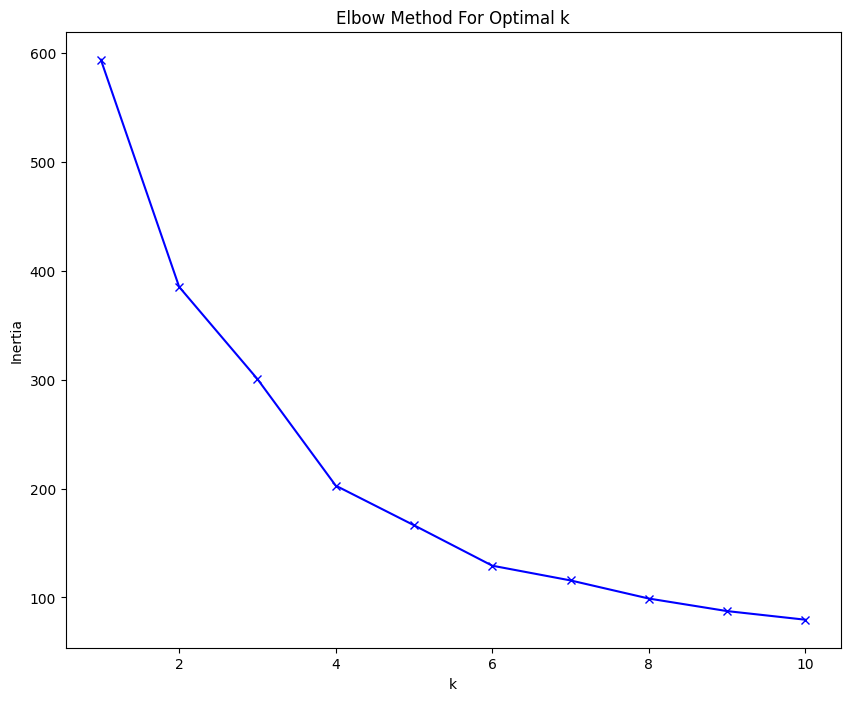

In [244]:
from sklearn.cluster import KMeans

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.figure(figsize=(10, 8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [245]:
# k=5로 모델 생성 및 학습
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

# 군집 결과 할당
data['Cluster'] = kmeans.labels_

/var/folders/kv/zsmhs7bj6sq4vwmj7wk239yc0000gn/T/ipykernel_99023/2701272872.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = kmeans.labels_


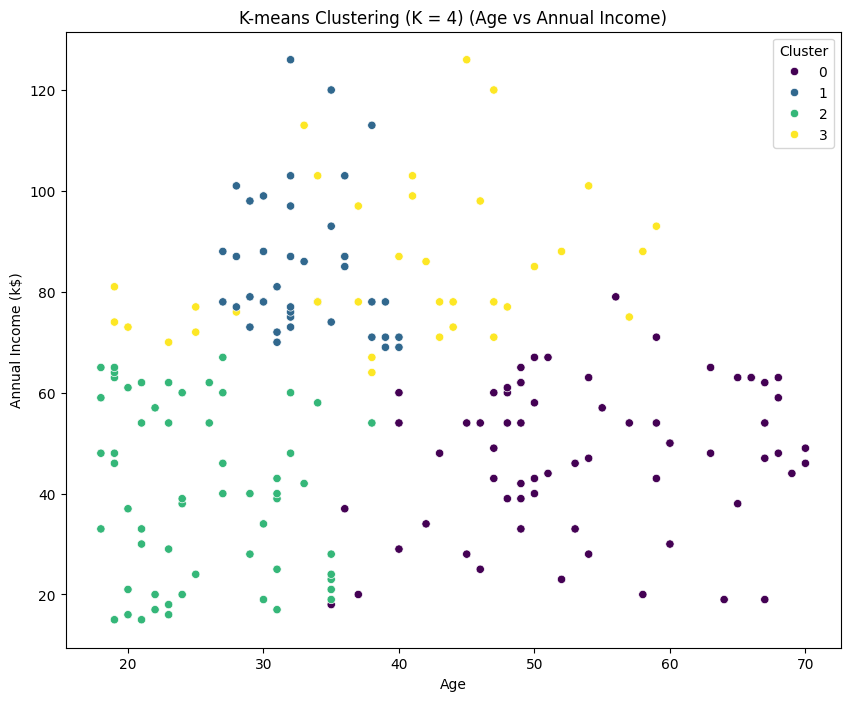

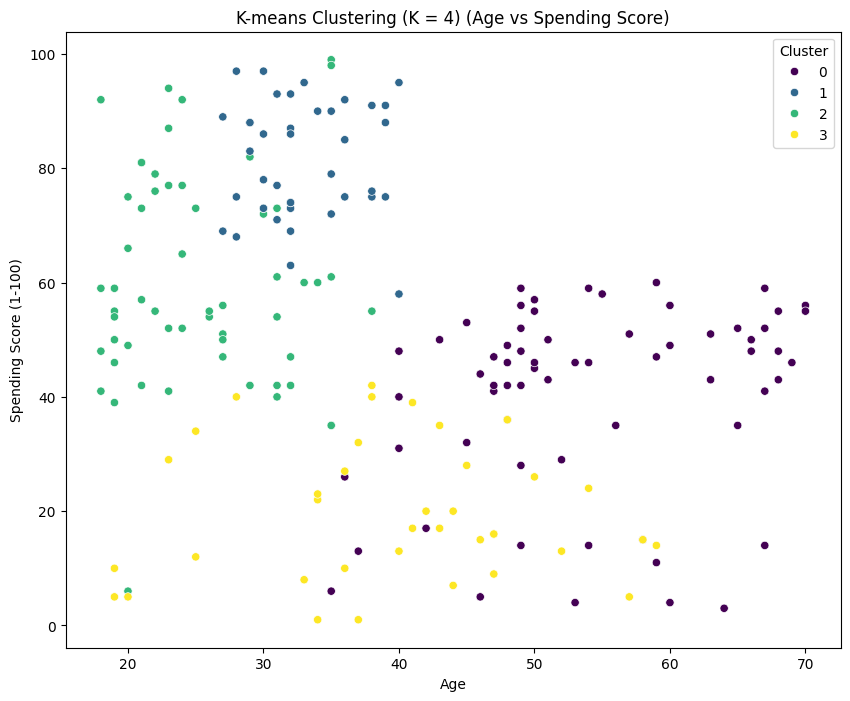

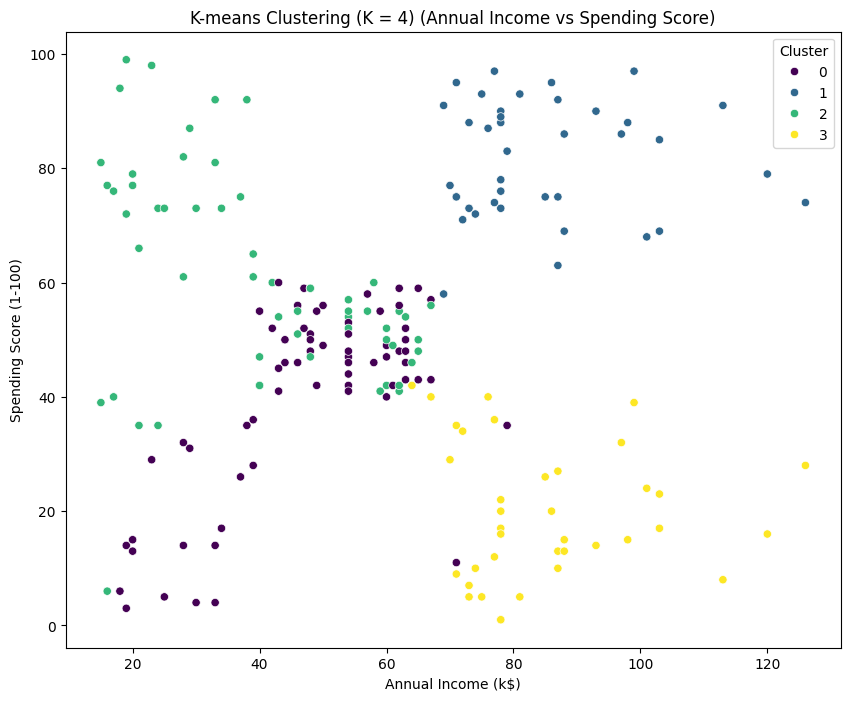

In [246]:
# 2차원으로 군집 시각화 (연령 vs 소득)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Age'], y=data['Annual Income (k$)'], hue=data['Cluster'], palette='viridis')
plt.title('K-means Clustering (K = 4) (Age vs Annual Income)')
plt.show()

# 2차원으로 군집 시각화 (연령 vs 지출 점수)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Age'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='viridis')
plt.title('K-means Clustering (K = 4) (Age vs Spending Score)')
plt.show()

# 2차원으로 군집 시각화 (소득 vs 지출 점수)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='viridis')
plt.title('K-means Clustering (K = 4) (Annual Income vs Spending Score)')
plt.show()

Cluster
0    65
2    57
1    39
3    37
Name: count, dtype: int64


/var/folders/kv/zsmhs7bj6sq4vwmj7wk239yc0000gn/T/ipykernel_99023/3727451512.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


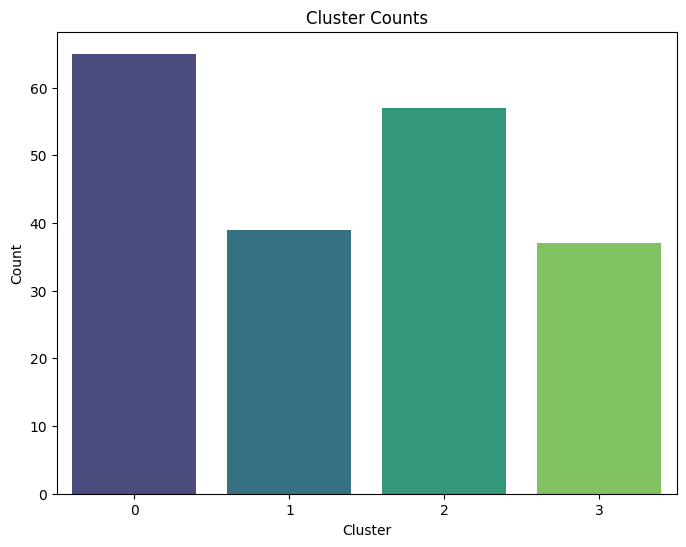

In [247]:
# Cluster 데이터와 개수 추출
cluster_counts = data['Cluster'].value_counts()
print(cluster_counts)
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Cluster Counts')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


In [248]:
from sklearn.metrics import silhouette_score

# 실루엣 점수 계산
silhouette_avg = silhouette_score(data.drop(['Cluster'], axis=1), data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.38615117797303533


In [249]:
# k=5로 모델 생성 및 학습
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)

# 군집 결과 할당
data['Cluster'] = kmeans.labels_

/var/folders/kv/zsmhs7bj6sq4vwmj7wk239yc0000gn/T/ipykernel_99023/3178296865.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = kmeans.labels_


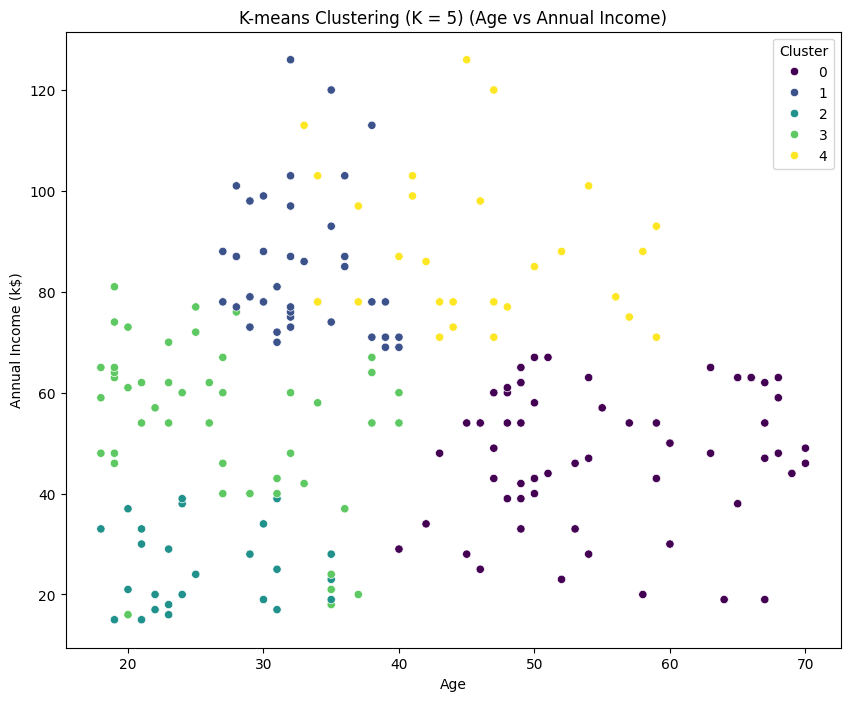

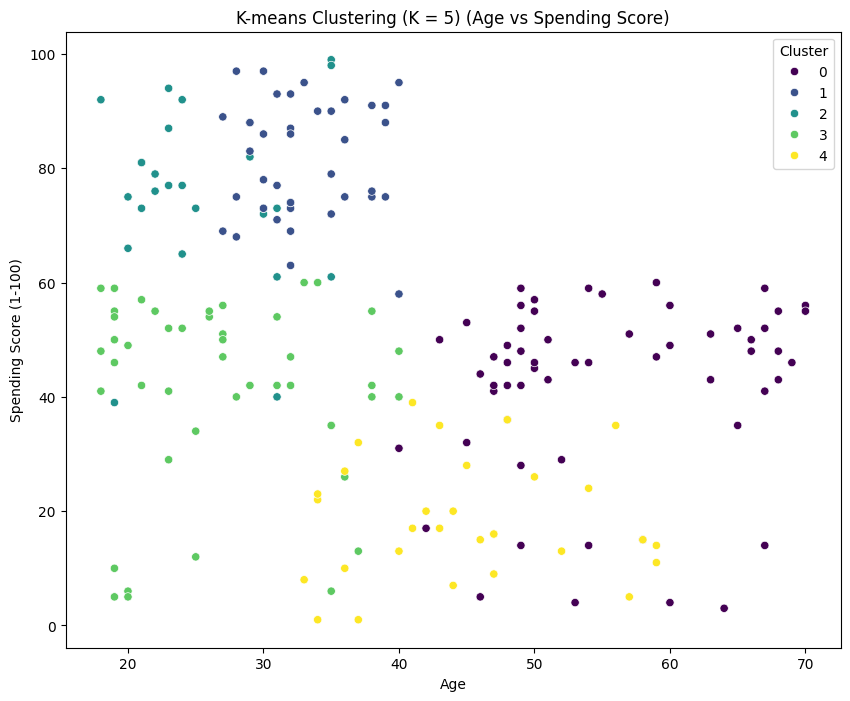

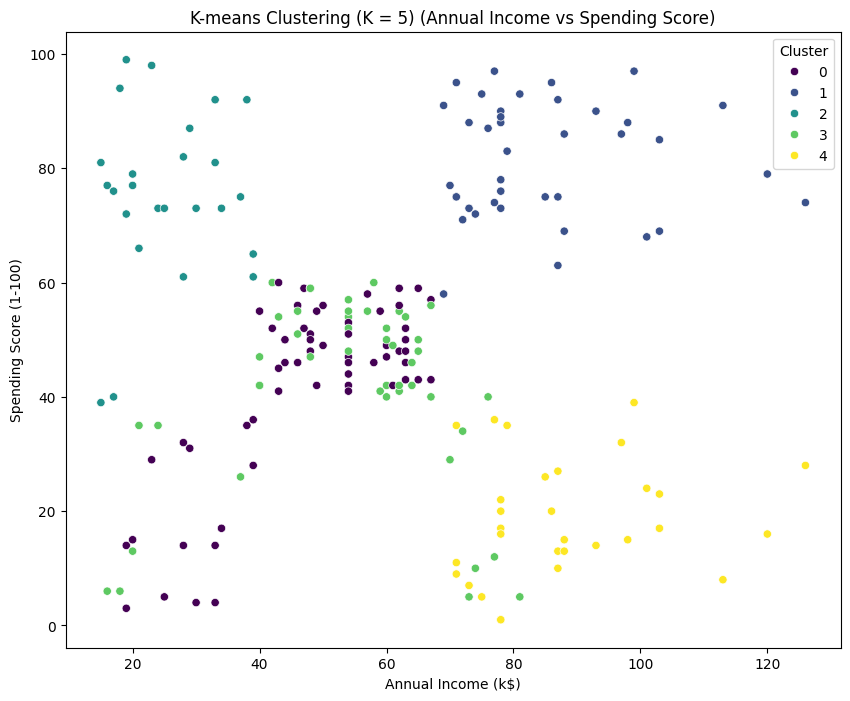

In [250]:
# 2차원으로 군집 시각화 (연령 vs 소득)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Age'], y=data['Annual Income (k$)'], hue=data['Cluster'], palette='viridis')
plt.title('K-means Clustering (K = 5) (Age vs Annual Income)')
plt.show()

# 2차원으로 군집 시각화 (연령 vs 지출 점수)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Age'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='viridis')
plt.title('K-means Clustering (K = 5) (Age vs Spending Score)')
plt.show()

# 2차원으로 군집 시각화 (소득 vs 지출 점수)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='viridis')
plt.title('K-means Clustering (K = 5) (Annual Income vs Spending Score)')
plt.show()

Cluster
0    58
3    46
1    39
4    30
2    25
Name: count, dtype: int64


/var/folders/kv/zsmhs7bj6sq4vwmj7wk239yc0000gn/T/ipykernel_99023/3727451512.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


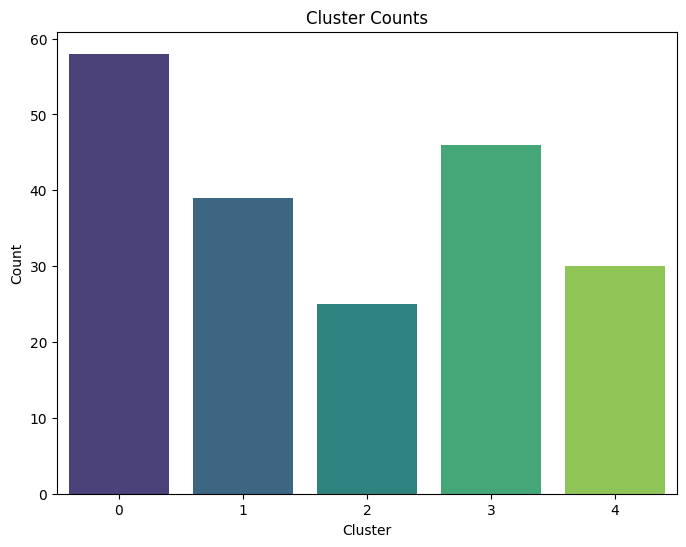

In [251]:
# Cluster 데이터와 개수 추출
cluster_counts = data['Cluster'].value_counts()
print(cluster_counts)
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Cluster Counts')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


In [252]:
#from sklearn.metrics import silhouette_score

# 실루엣 점수 계산
silhouette_avg = silhouette_score(data.drop(['Cluster'], axis=1), data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3929762557190579


In [253]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

X = customer_df_no_outliers[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

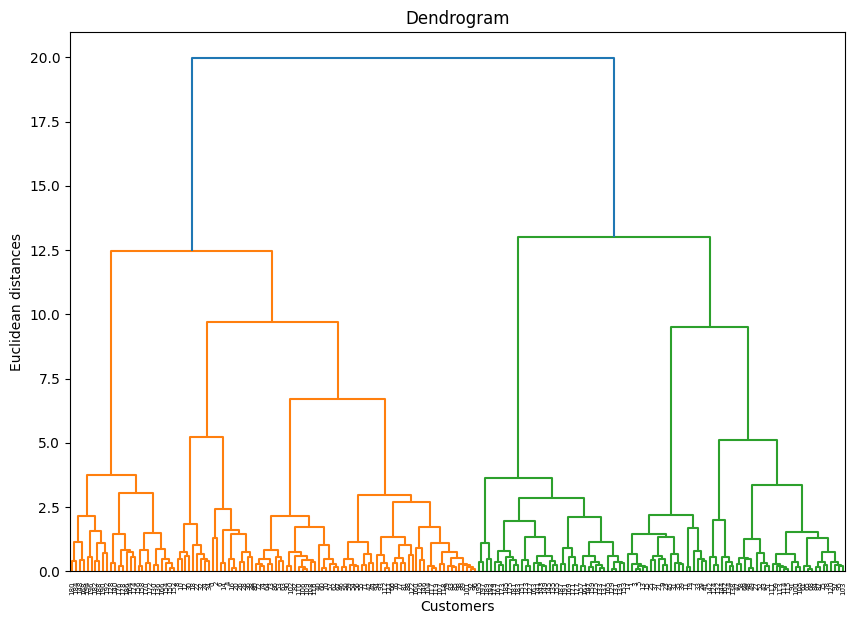

In [254]:
# 덴드로그램 생성
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

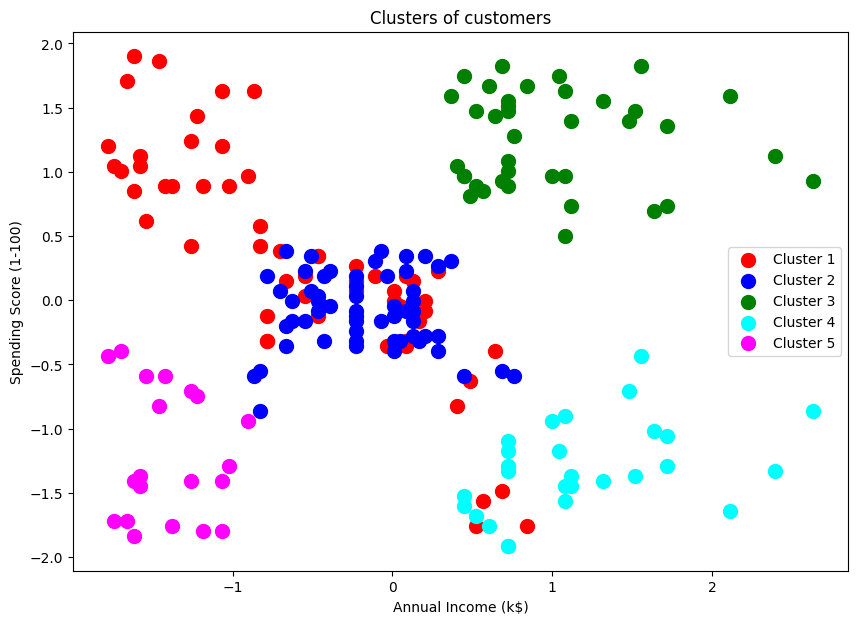

In [270]:
# 계층적 군집화 모델 생성
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

# 모델 학습 및 예측
y_hc = hc.fit_predict(X_scaled)

# 결과 시각화
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[y_hc == 0, 1], X_scaled[y_hc == 0, 2], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_hc == 1, 1], X_scaled[y_hc == 1, 2], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_hc == 2, 1], X_scaled[y_hc == 2, 2], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_hc == 3, 1], X_scaled[y_hc == 3, 2], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_hc == 4, 1], X_scaled[y_hc == 4, 2], s=100, c='magenta', label='Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

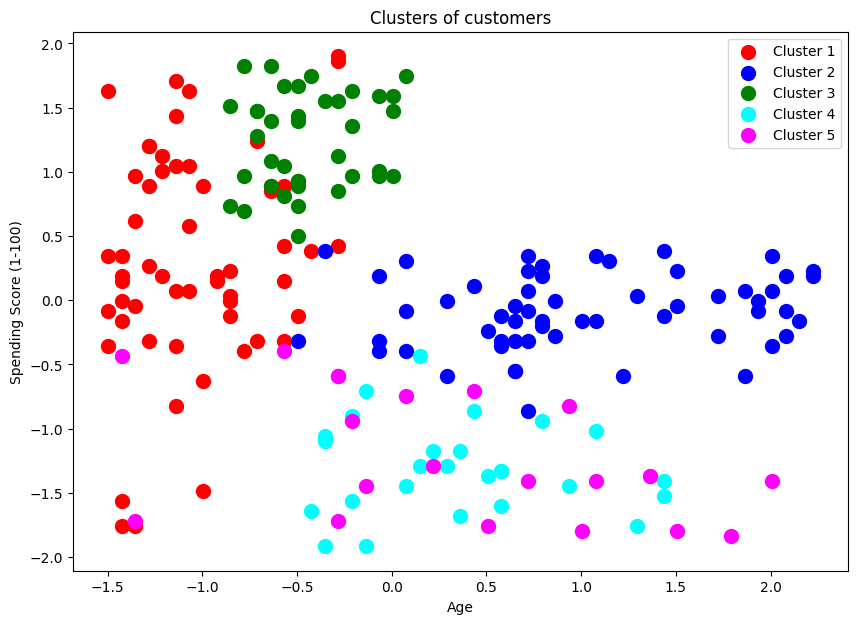

In [271]:
# 계층적 군집화 모델 생성
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

# 모델 학습 및 예측
y_hc = hc.fit_predict(X_scaled)

# 결과 시각화
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[y_hc == 0, 0], X_scaled[y_hc == 0, 2], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_hc == 1, 0], X_scaled[y_hc == 1, 2], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_hc == 2, 0], X_scaled[y_hc == 2, 2], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_hc == 3, 0], X_scaled[y_hc == 3, 2], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_hc == 4, 0], X_scaled[y_hc == 4, 2], s=100, c='magenta', label='Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [279]:
#from sklearn.metrics import silhouette_score

# 실루엣 점수 계산
silhouette_avg = silhouette_score(X_scaled, y_hc)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4006897229885412


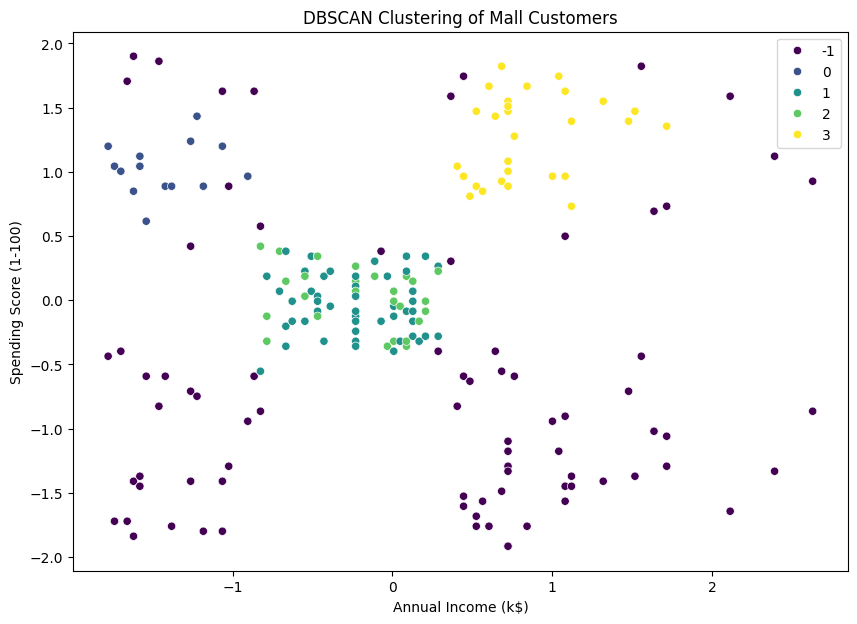

In [312]:
X= customer_df_no_outliers[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import DBSCAN

# DBSCAN 모델 생성
dbscan = DBSCAN(eps=0.5, min_samples=7)
y_dbscan = dbscan.fit_predict(X_scaled)
X_scaled[:, 0], X_scaled[:, 1]

# 군집화 결과 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_scaled[:, 1], y=X_scaled[:, 2], hue=y_dbscan, palette='viridis')
plt.title('DBSCAN Clustering of Mall Customers')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [313]:
silhouette_avg = silhouette_score(X, y_dbscan)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.21529772830887914
